In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import re
import os


In [2]:
topwords_2016 = [
    "http://5.189.161.24:8080/DATA/Spon_count_exact_zeit.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_merkel.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_vergangenen.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_usa.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_t%C3%BCrkei.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_trump.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_syrien.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_spiegel.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_spd.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_regierung.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_pr%C3%A4sident.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_polizei.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_menschen.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_land.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_is.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_fl%C3%BCchtlinge.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_europa.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_eu.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_erdogan.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_deutschland.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_clinton.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_cdu.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_angaben.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_afd.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_partei.csv"
]

syrian_war_words = [
    #"http://5.189.161.24:8080/DATA/Spon_count_exact_syrien.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_is.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_fl%C3%BCchtlinge.csv",
    #"http://5.189.161.24:8080/DATA/Spon_count_exact_afd.csv"
]

len(topwords_2016)

25

In [3]:
from datetime import datetime


def r_csv(w):
    df = pd.DataFrame.from_csv(w, index_col=0)    
    df.index = df.index.map(lambda x: datetime.strptime(x, '.%m.%Y'))
    return df
    
    

In [4]:
def plot_df(df):
    _ = [df.__delitem__(col) for col in df.columns if '_relativ' in col]
    plt.style.use('ggplot')
    ax = df.plot(
        title='Der Begriff {} im Verlauf von 2001 bis 2012'.format(" und ".join(df.columns.values)))
    plt.show()

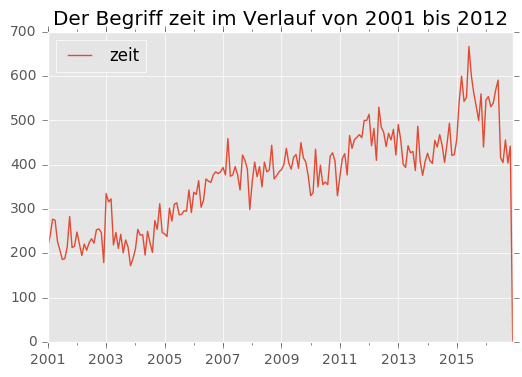

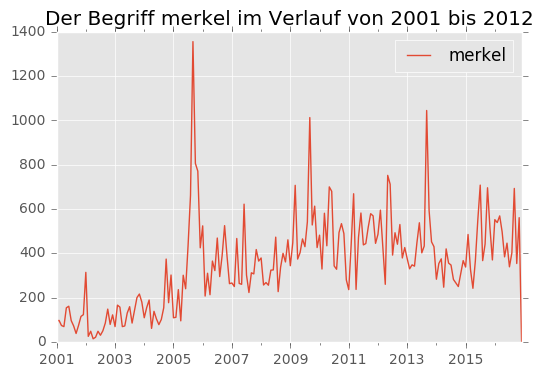

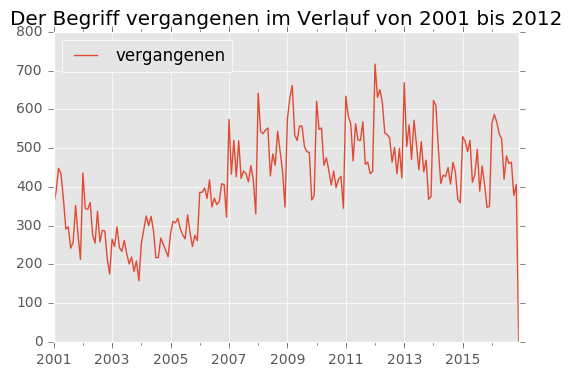

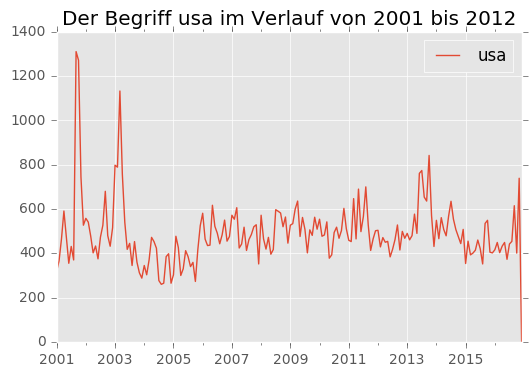

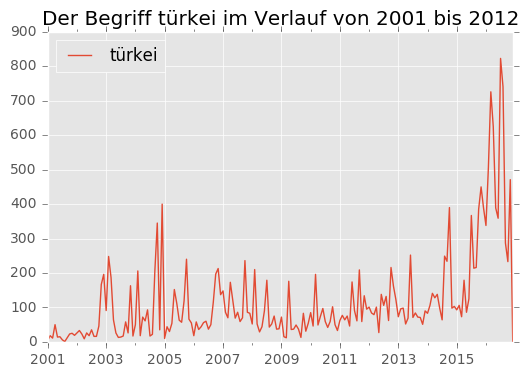

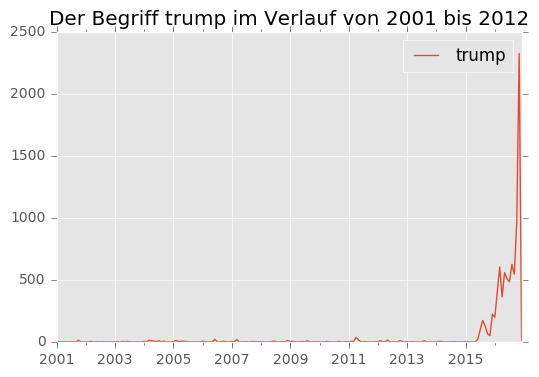

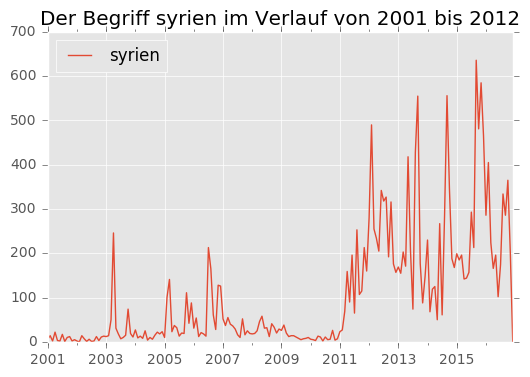

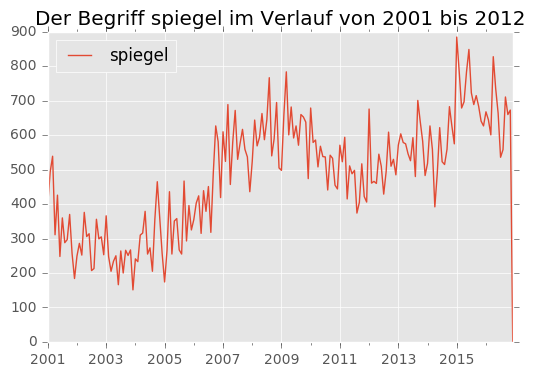

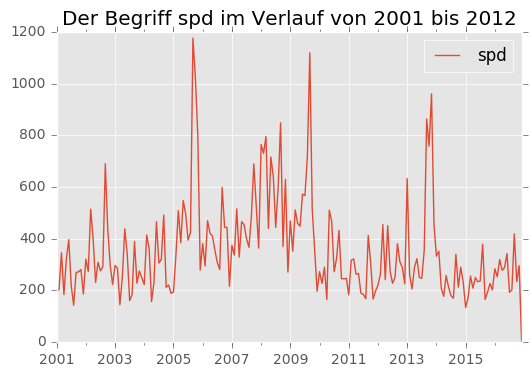

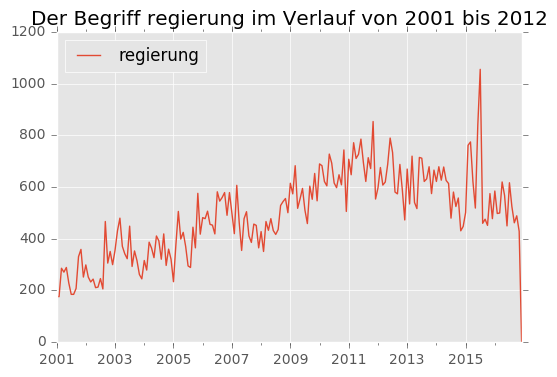

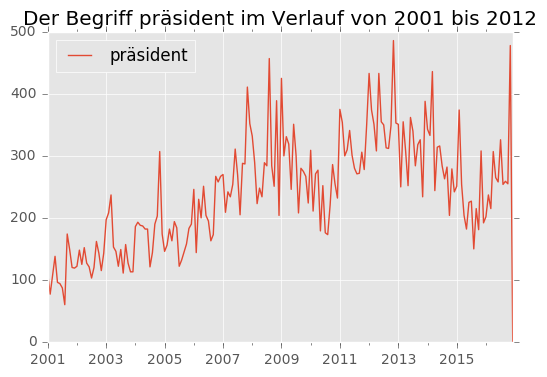

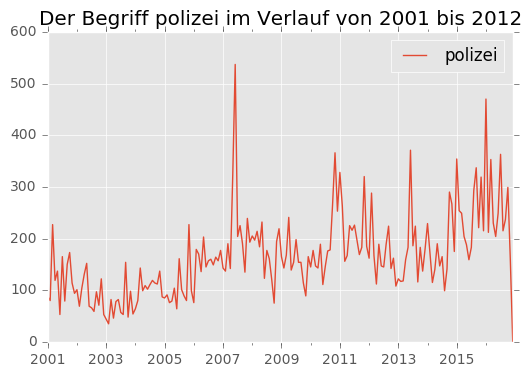

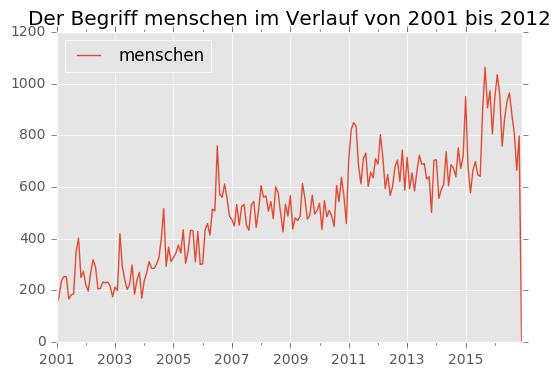

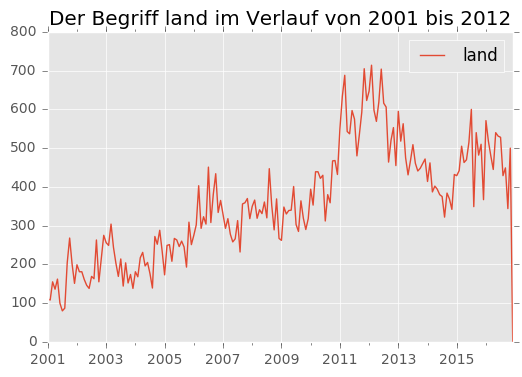

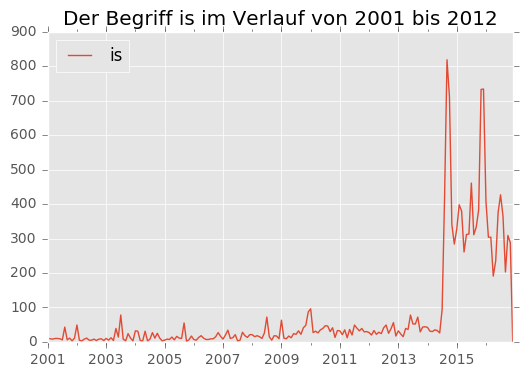

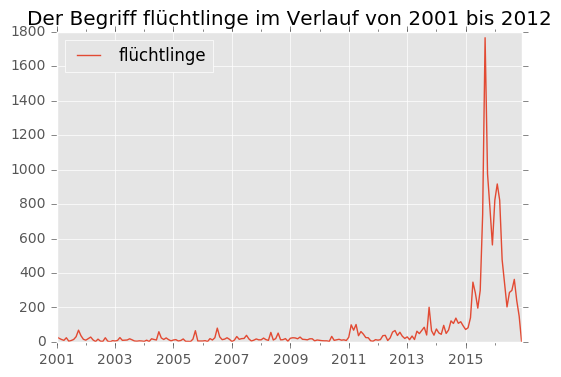

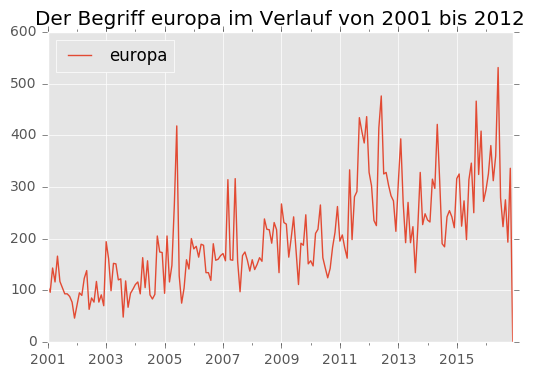

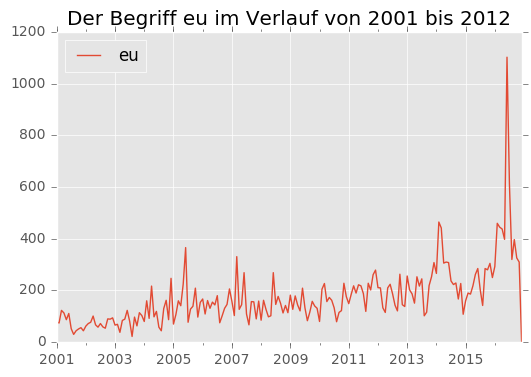

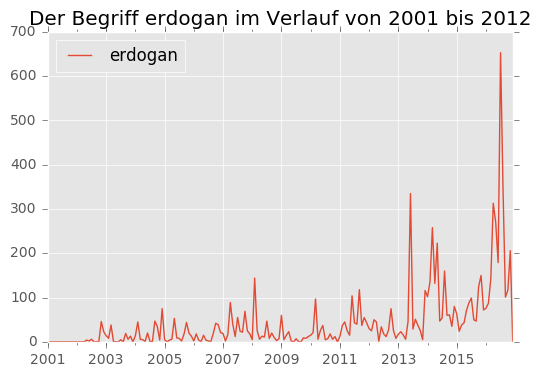

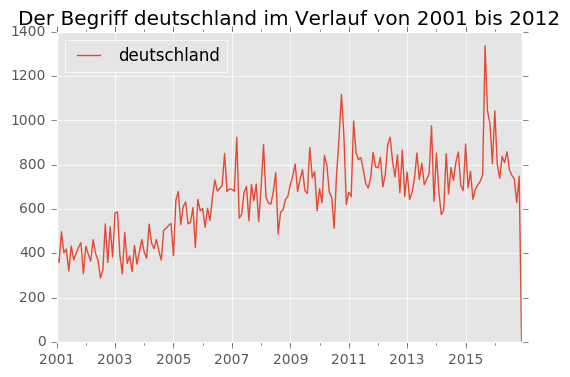

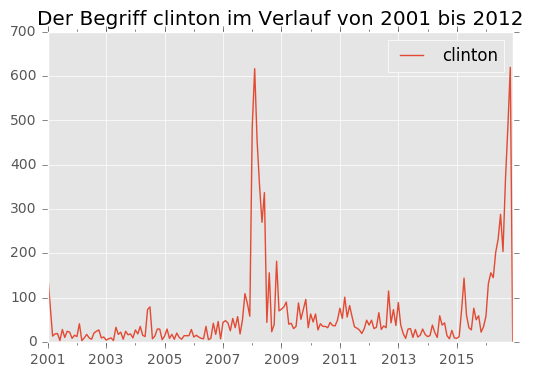

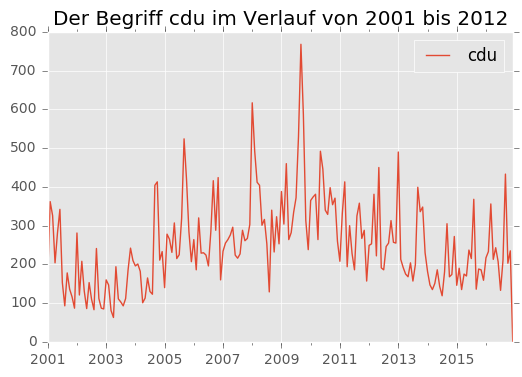

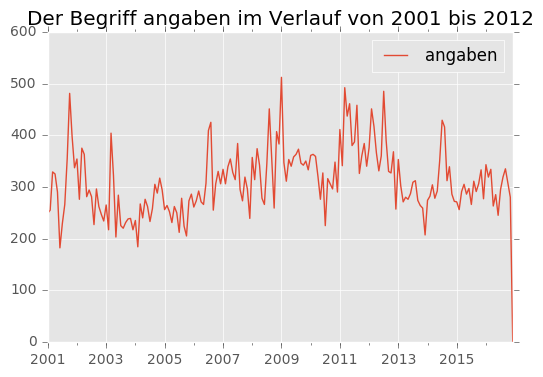

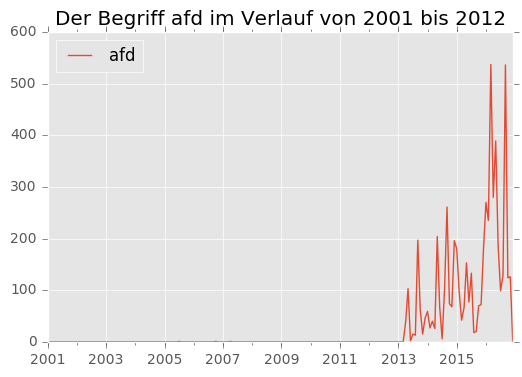

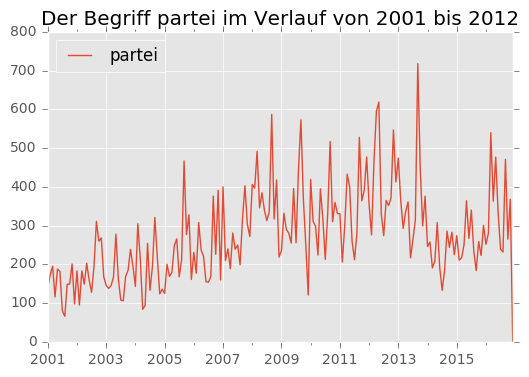

In [5]:
for word in topwords_2016:
    df = r_csv(word)
    
    plot_df(df)

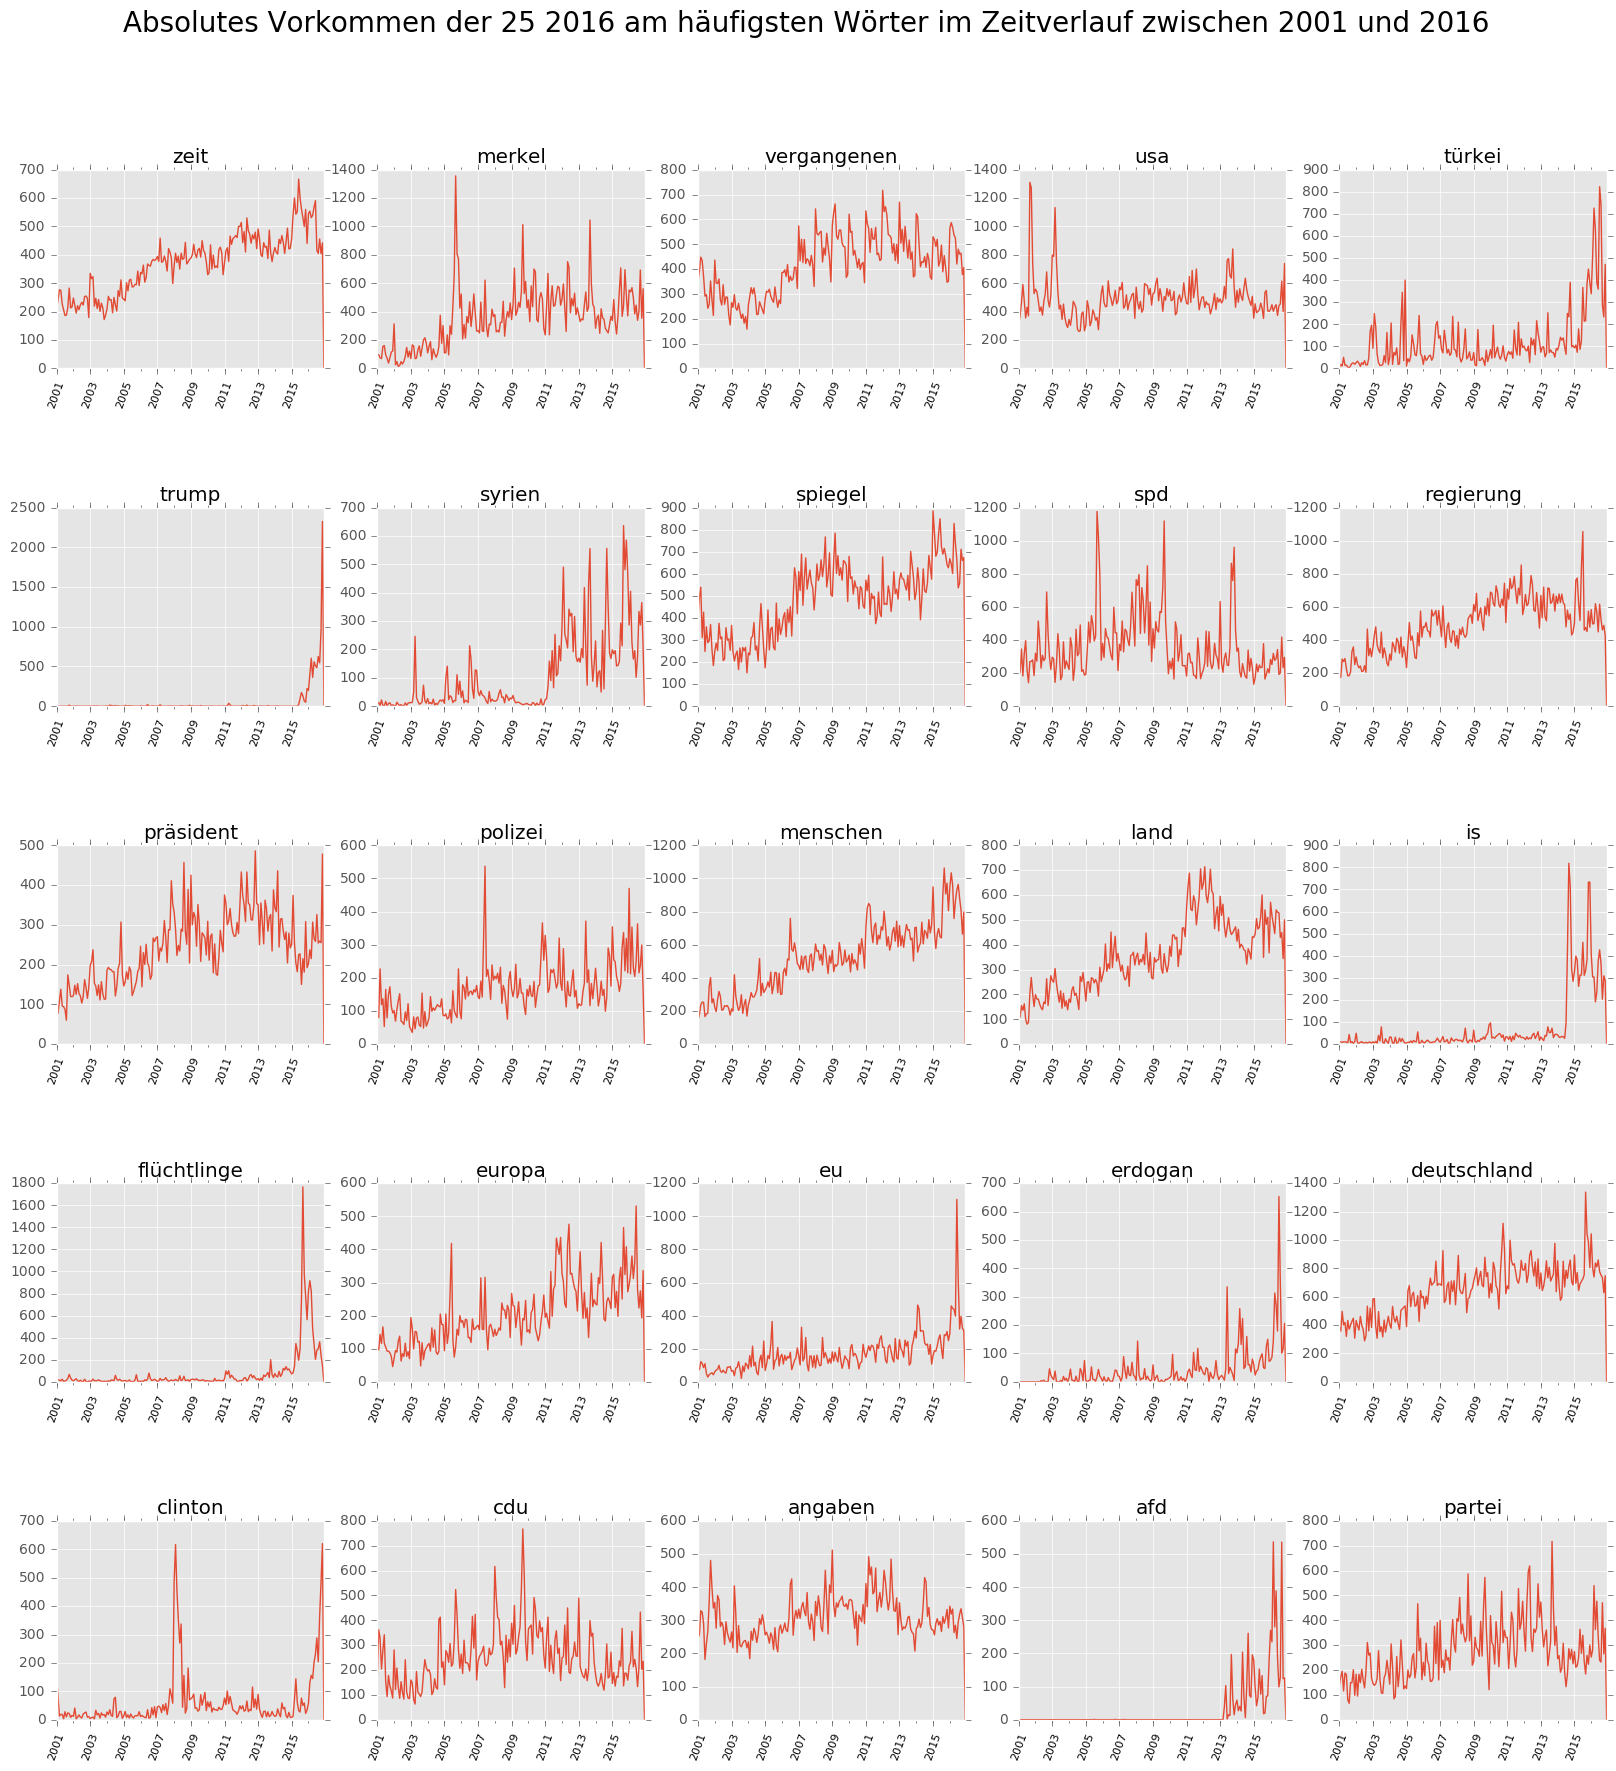

In [6]:


dfs = [r_csv(word) for word in topwords_2016]
plt.style.use('ggplot')

fig, axes = plt.subplots(5, 5, figsize=(20,20))
fig.subplots_adjust(hspace = 0.7)
fig.suptitle('Absolutes Vorkommen der 25 2016 am häufigsten Wörter im Zeitverlauf zwischen 2001 und 2016', fontsize=20)

for i in range(5):
    for j in range(5):
        indx = i*5+j
        plt.style.use('ggplot')
        
        df = dfs[indx]
        df = df[[c for c in df.columns if "_relativ" not in c]]
        ax = axes[i, j]
        df.plot(ax = ax)
        ax.legend_.remove()
        ax.set_title(''.join(df.columns.values))
        
        for tick in ax.get_xticklabels():
            tick.set_fontsize(8)
            tick.set_color('black')
            tick.set_rotation(70)
        
plt.show()

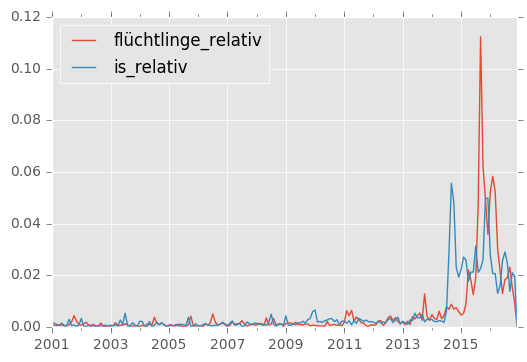

In [7]:


for i, word in enumerate(syrian_war_words):
    if i < 1:
        df = r_csv(word)
        continue
    _df = r_csv(word)
    df = pd.concat( [_df, df], axis=1)
    
df = df[[c for c in df.columns if "_relativ" in c]]


df.plot()